# Подготовка данных

In [1]:
from tensorflow import set_random_seed
import keras
import pandas as pd
import numpy as np

Instructions for updating:
Colocations handled automatically by placer.
203530
10000/10000 [==============================] - 1s 76us/sample - loss: 0.0661 - acc: 0.9820
0.982


In [2]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [3]:
X = train_df[train_df.columns[1:]].as_matrix()
y = np.array(train_df['label'])

c:\users\иван\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [4]:
indices = list(range(len(X)))
np.random.seed(42)
np.random.shuffle(indices)

In [5]:
train_ind, valid_ind = indices[10000:], indices[:10000]
X_train, X_valid, y_train, y_valid = X[train_ind], X[valid_ind], y[train_ind], y[valid_ind]

In [6]:
X_test = test_df[test_df.columns[1:]].as_matrix()

y_test = np.array(test_df['label'])

c:\users\иван\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [7]:
from tensorflow.keras import utils

y_train = utils.to_categorical(y_train)
y_valid = utils.to_categorical(y_valid)
y_test = utils.to_categorical(y_test)
X_train = X_train.astype('float32') / 255
X_valid = X_valid.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# 1. Логистическая регрессия

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
regres_model = Sequential()
regres_model.add(Dense(10, input_shape=(784,), activation='softmax'))
regres_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [10]:
from tensorflow.keras.callbacks import TensorBoard

regres_model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), verbose=0,
          callbacks=[TensorBoard('./logs/log_regr/')])

Instructions for updating:
Use tf.cast instead.


In [11]:
loss, regres_accuracy = regres_model.evaluate(X_test, y_test)

print("Logistic Regression, accuracy: {0:.4f}%".format(regres_accuracy * 100))

10000/10000 [==============================] - 0s 16us/sample - loss: 0.4286 - acc: 0.8547
Logistic Regression, accuracy: 85.4700%


c:\users\иван\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


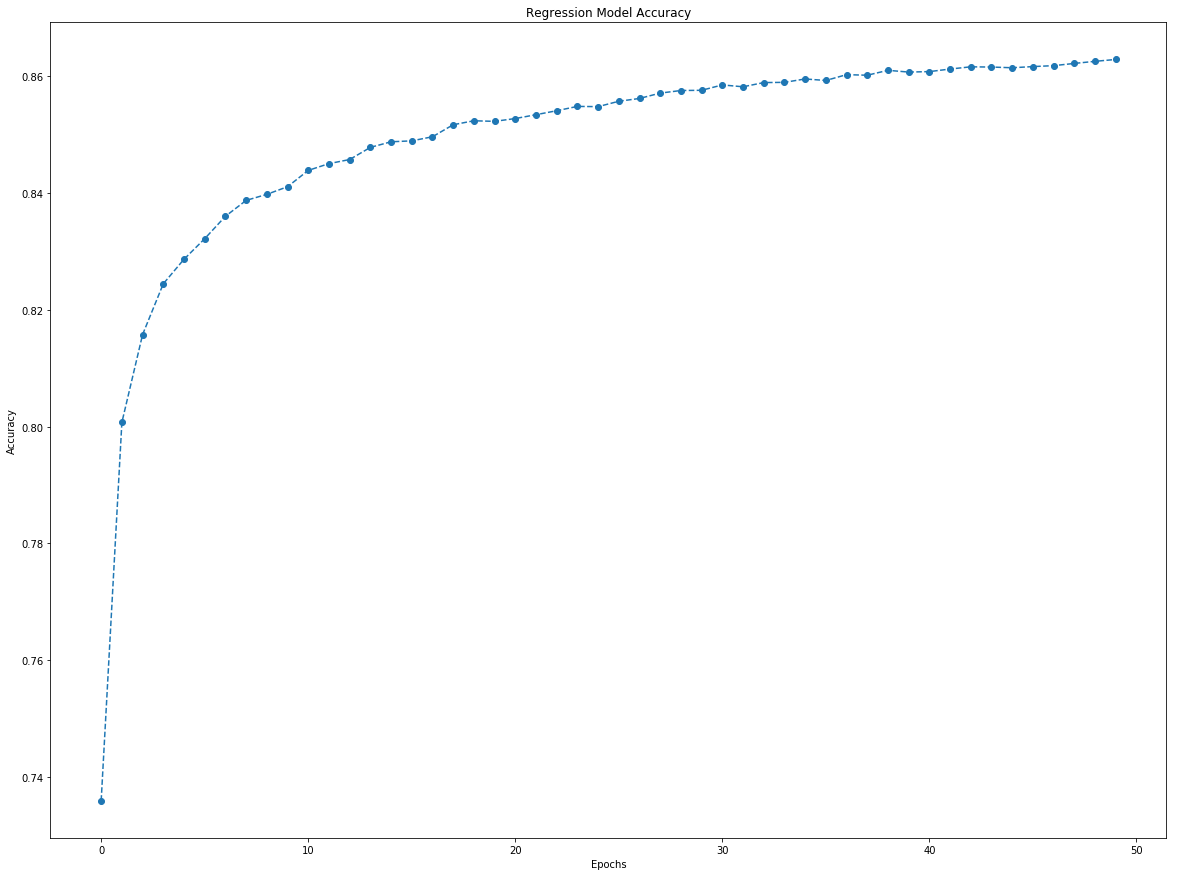

In [12]:
from matplotlib import pyplot as plt

%matplotlib inline

plot_df = pd.read_csv('regres_model_acc.csv')
x, y = plot_df[['Step']].as_matrix(), plot_df[['Value']].as_matrix()
plt.rcParams["figure.figsize"] = [20, 15]
plt.title('Regression Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(x, y, '--o')
plt.show()

# 2. Полносвязная нейронная сеть

In [13]:
full_model = Sequential()

full_model.add(Dense(784, activation='relu', input_shape=(784,)))
full_model.add(Dense(128, activation='relu'))
full_model.add(Dense(10, activation='softmax'))

full_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint('nn.h5', save_best_only=True, save_weights_only=True,
                                   mode='max', monitor='val_acc')

full_model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid),
          callbacks=[model_checkpoint])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 14s 286us/sample - loss: 0.4977 - acc: 0.8204 - val_loss: 0.4485 - val_acc: 0.8320
Epoch 2/15
50000/50000 [==============================] - 14s 283us/sample - loss: 0.3735 - acc: 0.8634 - val_loss: 0.3573 - val_acc: 0.8672
Epoch 3/15
50000/50000 [==============================] - 14s 270us/sample - loss: 0.3348 - acc: 0.8765 - val_loss: 0.3388 - val_acc: 0.8741
Epoch 4/15
50000/50000 [==============================] - 13s 266us/sample - loss: 0.3086 - acc: 0.8851 - val_loss: 0.3521 - val_acc: 0.8727
Epoch 5/15
50000/50000 [==============================] - 14s 272us/sample - loss: 0.2865 - acc: 0.8923 - val_loss: 0.3660 - val_acc: 0.8691
Epoch 6/15
50000/50000 [==============================] - 13s 265us/sample - loss: 0.2707 - acc: 0.8985 - val_loss: 0.3405 - val_acc: 0.8798
Epoch 7/15
50000/50000 [==============================] - 13s 269us/sample - loss: 0.2575 - acc: 0.9035 

In [15]:
full_model.load_weights('nn.h5')

loss, full_accuracy = full_model.evaluate(X_test, y_test)

print("Fully-Connected neural network, accuracy: {0:.4}%".format(full_accuracy * 100))

10000/10000 [==============================] - 1s 58us/sample - loss: 0.3233 - acc: 0.8912
Fully-Connected neural network, accuracy: 89.12%


Качество полносвязной нейронной сети на 3,65% выше, чем у линейной регресси. Это можно объяснить тем, что полносвязная нейронная сеть по своей сути является нелинейной моделью, которая может автоматически извлекать признаки из предложенных данных.

# 3. Сверточная нейронная сеть

In [16]:
X_train = X_train.reshape(50000, 28, 28, 1)
X_valid = X_valid.reshape(10000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

conv_model = Sequential()

conv_model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
conv_model.add(MaxPooling2D((2,2)))
conv_model.add(Conv2D(64, (3,3), activation='relu'))
conv_model.add(MaxPooling2D((2,2)))
conv_model.add(Flatten())
conv_model.add(Dense(128, activation='relu'))
conv_model.add(Dense(32, activation='relu'))
conv_model.add(Dense(10, activation='softmax'))

conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model_checkpoint = ModelCheckpoint('cnn-1.h5', save_best_only=True, save_weights_only=True, 
                                   mode='max', monitor='val_acc')

conv_model.fit(X_train, y_train, epochs=10, 
              validation_data=(X_valid, y_valid),
              callbacks=[model_checkpoint])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 23s 463us/sample - loss: 0.4981 - acc: 0.8195 - val_loss: 0.3664 - val_acc: 0.8682
Epoch 2/10
50000/50000 [==============================] - 23s 456us/sample - loss: 0.3292 - acc: 0.8811 - val_loss: 0.2953 - val_acc: 0.8919
Epoch 3/10
50000/50000 [==============================] - 22s 438us/sample - loss: 0.2787 - acc: 0.8974 - val_loss: 0.3139 - val_acc: 0.8865
Epoch 4/10
50000/50000 [==============================] - 22s 437us/sample - loss: 0.2495 - acc: 0.9072 - val_loss: 0.2807 - val_acc: 0.8987
Epoch 5/10
50000/50000 [==============================] - 22s 434us/sample - loss: 0.2190 - acc: 0.9184 - val_loss: 0.2725 - val_acc: 0.9010
Epoch 6/10
50000/50000 [==============================] - 22s 437us/sample - loss: 0.1956 - acc: 0.9265 - val_loss: 0.2487 - val_acc: 0.9061
Epoch 7/10
50000/50000 [==============================] - 22s 439us/sample - loss: 0.1736 - acc: 0.9349 

In [19]:
loss, conv_accuracy = conv_model.evaluate(X_test, y_test)

print("Convolutional neural network, accuracy: {0:.4}%".format(conv_accuracy * 100))

10000/10000 [==============================] - 1s 144us/sample - loss: 0.2674 - acc: 0.9135
Convolutional neural network, accuracy: 91.35%


В результате, качество сверточной нейронной сети на тестовых данных примерно на 2,23% процента выше полносвязной нейронной сети.

Cделаем нашу сверточную нейронную сеть немного глубже. Для этого добавим несколько сверточных слоев.

In [21]:
conv_model = Sequential()

conv_model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
conv_model.add(Conv2D(32, (3,3), activation='relu'))
conv_model.add(MaxPooling2D((2,2)))
conv_model.add(Conv2D(64, (3,3), activation='relu'))
conv_model.add(Conv2D(64, (3,3), activation='relu'))
conv_model.add(MaxPooling2D((2,2)))
conv_model.add(Flatten())
conv_model.add(Dense(128, activation='relu'))
conv_model.add(Dense(32, activation='relu'))
conv_model.add(Dense(10, activation='softmax'))

conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model_checkpoint = ModelCheckpoint('cnn-2.h5', save_best_only=True, save_weights_only=True,
                                   mode='max', monitor='val_acc')

In [23]:
conv_model.fit(X_train, y_train, epochs=10, 
              validation_data=(X_valid, y_valid),
              callbacks=[model_checkpoint, TensorBoard('./logs/cnn-2/')])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 69s 1ms/sample - loss: 0.5043 - acc: 0.8170 - val_loss: 0.3485 - val_acc: 0.8706
Epoch 2/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 0.3073 - acc: 0.8872 - val_loss: 0.2948 - val_acc: 0.8921
Epoch 3/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 0.2577 - acc: 0.9061 - val_loss: 0.2645 - val_acc: 0.9023
Epoch 4/10
50000/50000 [==============================] - 70s 1ms/sample - loss: 0.2260 - acc: 0.9165 - val_loss: 0.2437 - val_acc: 0.9122
Epoch 5/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 0.1994 - acc: 0.9268 - val_loss: 0.2634 - val_acc: 0.9072
Epoch 6/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 0.1782 - acc: 0.9340 - val_loss: 0.2369 - val_acc: 0.9167
Epoch 7/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 0.1597 - acc: 0.9408 - val_loss: 0.

In [24]:
conv_model.load_weights('cnn-2.h5')

In [25]:
loss, conv_accuracy = conv_model.evaluate(X_test, y_test)

print("Deeper convolutional neural network, accuracy: {0:.4}%".format(conv_accuracy * 100))

10000/10000 [==============================] - 4s 404us/sample - loss: 0.2292 - acc: 0.9210
Deeper convolutional neural network, accuracy: 92.1%


Качество модели немного улучшилось

Добавим Batch Normalization слои после сверточных слоев

In [26]:
from tensorflow.keras.layers import BatchNormalization

conv_model = Sequential()

conv_model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
conv_model.add(BatchNormalization())
conv_model.add(Conv2D(32, (3,3), activation='relu'))
conv_model.add(BatchNormalization())
conv_model.add(MaxPooling2D((2,2)))
conv_model.add(Conv2D(64, (3,3), activation='relu'))
conv_model.add(BatchNormalization())
conv_model.add(Conv2D(64, (3,3), activation='relu'))
conv_model.add(BatchNormalization())
conv_model.add(MaxPooling2D((2,2)))
conv_model.add(Flatten())

conv_model.add(Dense(128, activation='relu'))
conv_model.add(Dense(32, activation='relu'))
conv_model.add(Dense(10, activation='softmax'))

conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model_checkpoint = ModelCheckpoint('cnn-3.h5', save_best_only=True, save_weights_only=True,
                                   mode='max', monitor='val_acc')

In [28]:
conv_model.fit(X_train, y_train, epochs=10, 
              validation_data=(X_valid, y_valid),
              callbacks=[model_checkpoint])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 184s 4ms/sample - loss: 0.4063 - acc: 0.8531 - val_loss: 0.3753 - val_acc: 0.8719
Epoch 2/10
50000/50000 [==============================] - 183s 4ms/sample - loss: 0.2692 - acc: 0.9020 - val_loss: 0.2700 - val_acc: 0.9055
Epoch 3/10
50000/50000 [==============================] - 184s 4ms/sample - loss: 0.2295 - acc: 0.9160 - val_loss: 0.3003 - val_acc: 0.8920
Epoch 4/10
50000/50000 [==============================] - 186s 4ms/sample - loss: 0.1991 - acc: 0.9268 - val_loss: 0.2475 - val_acc: 0.9098
Epoch 5/10
50000/50000 [==============================] - 185s 4ms/sample - loss: 0.1735 - acc: 0.9367 - val_loss: 0.2503 - val_acc: 0.9126
Epoch 6/10
50000/50000 [==============================] - 189s 4ms/sample - loss: 0.1507 - acc: 0.9443 - val_loss: 0.2546 - val_acc: 0.9134
Epoch 7/10
50000/50000 [==============================] - 190s 4ms/sample - loss: 0.1296 - acc: 0.9525 - val_l

In [29]:
conv_model.load_weights('cnn-3.h5')

In [30]:
loss, conv_accuracy = conv_model.evaluate(X_test, y_test)

print("Deeper convolutional neural network with BatchNormalization, accuracy: {0:.4}%".format(conv_accuracy * 100))

10000/10000 [==============================] - 5s 467us/sample - loss: 0.2413 - acc: 0.9277s - loss: 0.2428 - acc: 0.92
Deeper convolutional neural network with BatchNormalization, accuracy: 92.77%


В результате, качество сверточной нейронной сети немного улучшилось из-за использование BatchNormalization.

В итоге лучший результат показала глубокая сверточная сеть с BatchNormalization слоями после сверточных слоев. Итоговое качество на тестовой выборке составило 92,77%.